# <p style="text-align:center;">**Entrega n°2, Camino B**</p>
### <p style="text-align:center;">Sebastián y Vicente Ramírez.</p>
### <p style="text-align:center;">Pasos iniciales.</p>
#### Importación de librerías.

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy as sp
import itertools as it
import warnings

# Para una visualización más limpia (esta parte del código se con todo estructurado)
# para evitar ignorar los warnings necesarios durante el proceso de desarrollo
# warnings.filterwarnings("ignore")

# Configuración pandas
pd.set_option('display.max_columns', None)

#### Apertura y resumen del dataset.
En parquet, debido a que se hizo en la taréa anterior.

In [103]:
df = pd.read_parquet("GRD_2023_DESCRIPTIVE.parquet", engine="pyarrow")

#Información principal de df y primeras observaciones
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1038754 entries, 0 to 1039586
Data columns (total 24 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   COD_HOSPITAL         1038754 non-null  int64  
 1   CIP_ENCRIPTADO       1037121 non-null  float64
 2   SEXO                 1038715 non-null  object 
 3   FECHA_NACIMIENTO     1038744 non-null  object 
 4   SERVICIO_SALUD       1038013 non-null  object 
 5   TIPO_INGRESO         1038699 non-null  object 
 6   FECHA_INGRESO        1038754 non-null  object 
 7   FECHAALTA            1038754 non-null  object 
 8   TIPOALTA             1038754 non-null  object 
 9   DIAGNOSTICO1         1038754 non-null  object 
 10  IR_29301_COD_GRD     1038754 non-null  float64
 11  IR_29301_PESO        1038754 non-null  float64
 12  IR_29301_SEVERIDAD   1038754 non-null  float64
 13  IR_29301_MORTALIDAD  1038754 non-null  float64
 14  EDAD                 1038744 non-null  float64
 15  DIA

,COD_HOSPITAL,CIP_ENCRIPTADO,SEXO,FECHA_NACIMIENTO,SERVICIO_SALUD,TIPO_INGRESO,FECHA_INGRESO,FECHAALTA,TIPOALTA,DIAGNOSTICO1,IR_29301_COD_GRD,IR_29301_PESO,IR_29301_SEVERIDAD,IR_29301_MORTALIDAD,EDAD,DIAS_ESTANCIA,HOSPITAL,Versión,Descripción,Categoría,Sección,Capítulo,DESCRIPCION_GRD,peso_categoria
0,122100,72196813.0,HOMBRE,1980-04-13,VALDIVIA,URGENCIA,2023-03-12,2023-03-14,DOMICILIO,K35.3,64161.0,0.7094,1.0,1.0,43.0,2,Hospital Clínico Regional (Valdivia),CIE-v2013,Apendicitis aguda con peritonitis localizada,K35 APENDICITIS AGUDA,K35-K38 ENFERMEDADES DEL APÉNDICE,Cap.11 ENFERMEDADES DEL APARATO DIGESTIVO (K0...,MH INFECCIONES GASTROINTESTINALES MAYORES,Medio-Bajo
1,114101,NaN,HOMBRE,2001-11-04,METROPOLITANO SURORIENTE,URGENCIA,2023-11-04,2023-11-10,DOMICILIO,J93.1,41301.0,1.0869,1.0,1.0,22.0,6,Complejo Hospitalario Dr. Sótero del Río (San...,CIE-v2013,Otros tipos de neumotórax espontáneo,J93 NEUMOTÓRAX,J90-J94 OTRAS ENFERMEDADES DE LA PLEURA,Cap.10 ENFERMEDADES DEL APARATO RESPIRATORIO ...,PH PROCEDIMIENTOS MODERADAMENTE COMPLEJOS SOB...,Medio
2,114101,97627974.0,HOMBRE,2020-07-30,METROPOLITANO SURORIENTE,URGENCIA,2023-06-07,2023-06-08,HOSPITALIZACIÓN DOMICILIARIA,J12.1,44161.0,0.4084,1.0,1.0,3.0,1,Complejo Hospitalario Dr. Sótero del Río (San...,CIE-v2013,Neumonía debida a virus sincitial respiratorio,"J12 NEUMONÍA VIRAL, NO CLASIFICADA EN OTRA PARTE",J09-J18 GRIPE Y NEUMONÍA,Cap.10 ENFERMEDADES DEL APARATO RESPIRATORIO ...,MH NEUMONÍA SIMPLE Y TOS FERINA,Bajo
3,106103,67770674.0,MUJER,1978-11-14,VALPARAISO SAN ANTONIO,PROGRAMADA,2023-05-25,2023-05-26,DOMICILIO,N39.3,131301.0,0.6406,1.0,1.0,45.0,1,Hospital Claudio Vicuña (San Antonio),CIE-v2013,Incontinencia urinaria por tensión,N39 OTROS TRASTORNOS DEL SISTEMA URINARIO,N30-N39 OTRAS ENFERMEDADES DEL APARATO URINARIO,Cap.14 ENFERMEDADES DEL APARATO GENITOURINARI...,PH HISTERECTOMIA VAGINAL Y OTROS PROCEDIMIENT...,Medio-Bajo
4,106103,100390800.0,MUJER,2023-12-20,VALPARAISO SAN ANTONIO,URGENCIA,2023-12-28,2023-12-30,DOMICILIO,R17,74131.0,0.5346,1.0,1.0,0.0,2,Hospital Claudio Vicuña (San Antonio),CIE-v2013,Ictericia no especificada,R17 ICTERICIA NO ESPECIFICADA,R10-R19 SÍNTOMAS Y SIGNOS QUE AFECTAN AL APAR...,"Cap.18 SÍNTOMAS, SIGNOS Y RESULTADOS ANORMALE...","MH ENFERMEDADES HEPÁTICAS EXCEPTO NEOPLASIAS,...",Medio-Bajo


#### Para ver la posibilidad de contar reingreso como variable, hay que eliminar los CIP desconocidos (nulos)

In [104]:
print(f'Número de nulos: {df["CIP_ENCRIPTADO"].isnull().sum()}')
print(f'Porcentaje de nulos: {round((df["CIP_ENCRIPTADO"].isnull().sum()/len(df))*100, 2)}%')
print('\n---------------------------------------------------------------------------\n')

Número de nulos: 1633
Porcentaje de nulos: 0.16%

---------------------------------------------------------------------------



Como son menos del 0.2%, no hay problema en eliminarlos

In [105]:
df.dropna(subset=["CIP_ENCRIPTADO"], inplace = True)
df.reset_index(drop = True, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037121 entries, 0 to 1037120
Data columns (total 24 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   COD_HOSPITAL         1037121 non-null  int64  
 1   CIP_ENCRIPTADO       1037121 non-null  float64
 2   SEXO                 1037082 non-null  object 
 3   FECHA_NACIMIENTO     1037111 non-null  object 
 4   SERVICIO_SALUD       1036382 non-null  object 
 5   TIPO_INGRESO         1037066 non-null  object 
 6   FECHA_INGRESO        1037121 non-null  object 
 7   FECHAALTA            1037121 non-null  object 
 8   TIPOALTA             1037121 non-null  object 
 9   DIAGNOSTICO1         1037121 non-null  object 
 10  IR_29301_COD_GRD     1037121 non-null  float64
 11  IR_29301_PESO        1037121 non-null  float64
 12  IR_29301_SEVERIDAD   1037121 non-null  float64
 13  IR_29301_MORTALIDAD  1037121 non-null  float64
 14  EDAD                 1037111 non-null  float64
 15

#### Filtrar por los 30 primeros diagnósticos más repetidos.
Debido a que hay +5000 categorías distintas, sería útil para un modelo a gran escala, pero en este caso es un modelo más acotado con objetivo de estudio previo, para ver la posibilidad de que se pueda escalar más allá

In [106]:
mas_repetidos = df.groupby("Descripción")["Descripción"].value_counts().to_frame("Apariciones").sort_values(by = "Apariciones", ascending = False).head(30).reset_index()
mas_repetidos = np.array(mas_repetidos["Descripción"])
mas_repetidos

df = df[df["Descripción"].isin(mas_repetidos)]
df.reset_index(drop = True, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250386 entries, 0 to 250385
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   COD_HOSPITAL         250386 non-null  int64  
 1   CIP_ENCRIPTADO       250386 non-null  float64
 2   SEXO                 250384 non-null  object 
 3   FECHA_NACIMIENTO     250385 non-null  object 
 4   SERVICIO_SALUD       250240 non-null  object 
 5   TIPO_INGRESO         250384 non-null  object 
 6   FECHA_INGRESO        250386 non-null  object 
 7   FECHAALTA            250386 non-null  object 
 8   TIPOALTA             250386 non-null  object 
 9   DIAGNOSTICO1         250386 non-null  object 
 10  IR_29301_COD_GRD     250386 non-null  float64
 11  IR_29301_PESO        250386 non-null  float64
 12  IR_29301_SEVERIDAD   250386 non-null  float64
 13  IR_29301_MORTALIDAD  250386 non-null  float64
 14  EDAD                 250385 non-null  float64
 15  DIAS_ESTANCIA    

#### Variable de si reingresó o no (La primera aparación no es reingreso, solo de la segunda en adelante)
1. Ordenar por fecha

In [107]:
df["FECHA_INGRESO"] = df["FECHA_INGRESO"].astype('datetime64[ns]')
df = df.sort_values(by = "FECHA_INGRESO", ascending = True)
df.reset_index(drop = True, inplace = True)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250386 entries, 0 to 250385
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   COD_HOSPITAL         250386 non-null  int64         
 1   CIP_ENCRIPTADO       250386 non-null  float64       
 2   SEXO                 250384 non-null  object        
 3   FECHA_NACIMIENTO     250385 non-null  object        
 4   SERVICIO_SALUD       250240 non-null  object        
 5   TIPO_INGRESO         250384 non-null  object        
 6   FECHA_INGRESO        250386 non-null  datetime64[ns]
 7   FECHAALTA            250386 non-null  object        
 8   TIPOALTA             250386 non-null  object        
 9   DIAGNOSTICO1         250386 non-null  object        
 10  IR_29301_COD_GRD     250386 non-null  float64       
 11  IR_29301_PESO        250386 non-null  float64       
 12  IR_29301_SEVERIDAD   250386 non-null  float64       
 13  IR_29301_MORTA

Revisar reingresos

In [108]:
def reingreso(row):
    if row:
        return 1
    return 0

df["REINGRESO"] = df["CIP_ENCRIPTADO"].duplicated()
df["REINGRESO"] = df["REINGRESO"].apply(reingreso)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250386 entries, 0 to 250385
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   COD_HOSPITAL         250386 non-null  int64         
 1   CIP_ENCRIPTADO       250386 non-null  float64       
 2   SEXO                 250384 non-null  object        
 3   FECHA_NACIMIENTO     250385 non-null  object        
 4   SERVICIO_SALUD       250240 non-null  object        
 5   TIPO_INGRESO         250384 non-null  object        
 6   FECHA_INGRESO        250386 non-null  datetime64[ns]
 7   FECHAALTA            250386 non-null  object        
 8   TIPOALTA             250386 non-null  object        
 9   DIAGNOSTICO1         250386 non-null  object        
 10  IR_29301_COD_GRD     250386 non-null  float64       
 11  IR_29301_PESO        250386 non-null  float64       
 12  IR_29301_SEVERIDAD   250386 non-null  float64       
 13  IR_29301_MORTA

#### Eliminar columnas que no se consideran necesarias. (O repetitivas).
Las columnas:
- 0
- 1
- 3
- De la 6 a la 9 (DIAGNOSTICO1 Se reemplaza por "Descripcion", que es el diagnostico 1 pero decodificado)
- De la 10 a la 13
- 17
- De la 19 a la 23

In [109]:
# Drop de la selección
df = df.drop(np.array(df.columns)[[0, 1, 3, 6, 7, 8, 9, 10, 11, 12, 13, 17, 19, 20, 21, 22, 23]], axis=1)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250386 entries, 0 to 250385
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEXO            250384 non-null  object 
 1   SERVICIO_SALUD  250240 non-null  object 
 2   TIPO_INGRESO    250384 non-null  object 
 3   EDAD            250385 non-null  float64
 4   DIAS_ESTANCIA   250386 non-null  int64  
 5   HOSPITAL        250386 non-null  object 
 6   Descripción     250386 non-null  object 
 7   REINGRESO       250386 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 15.3+ MB


### <p style="text-align:center;">Análisis variable objetivo (Días estancia) </p>


In [110]:
array = np.array(df["DIAS_ESTANCIA"]) # Transformación a array para poder usar funciones de numpy
print('DÍAS DE ESTANCIA')
print('\n---------------------------------------------------------------------------\n')
print(f'Mínimo:              {np.nanmin(array)}')
print(f'10%:                 {np.nanpercentile(array, 10)}')
print(f'25%:                 {np.nanpercentile(array, 25)}')
print(f'Mediana:             {np.nanmedian(array)}')
print(f'75%:                 {np.nanpercentile(array, 75)}')
print(f'90%:                 {np.nanpercentile(array, 90)}')
print(f'Máximo:              {np.nanmax(array)}')    
print(f'Promedio:            {round(np.nanmean(array), 2)}')
print(f'Desviación Estandar: {round(np.nanstd(array), 2)}')
print("\n---------------------------------------------------------------------------\n")

DÍAS DE ESTANCIA

---------------------------------------------------------------------------

Mínimo:              0
10%:                 0.0
25%:                 0.0
Mediana:             2.0
75%:                 4.0
90%:                 8.0
Máximo:              419
Promedio:            3.39
Desviación Estandar: 7.66

---------------------------------------------------------------------------



Debido a la diferencia entre el percentil 90 y el máximo, se realiza un análisis más profundo.

In [111]:
array = np.array(df["DIAS_ESTANCIA"])
print('DÍAS DE ESTANCIA:')
print('\n---------------------------------------------------------------------------\n')
print(f'91%:                 {np.nanpercentile(array, 91)}')
print(f'92%:                 {np.nanpercentile(array, 92)}')
print(f'93%:                 {np.nanpercentile(array, 93)}')
print(f'94%:                 {np.nanpercentile(array, 94)}')
print(f'95%:                 {np.nanpercentile(array, 95)}')
print(f'96%:                 {np.nanpercentile(array, 96)}')
print(f'97%:                 {np.nanpercentile(array, 97)}')
print(f'98%:                 {np.nanpercentile(array, 98)}')
print(f'99%:                 {np.nanpercentile(array, 99)}')
print("\n---------------------------------------------------------------------------\n")

DÍAS DE ESTANCIA:

---------------------------------------------------------------------------

91%:                 9.0
92%:                 10.0
93%:                 11.0
94%:                 12.0
95%:                 13.0
96%:                 15.0
97%:                 18.0
98%:                 22.0
99%:                 32.0

---------------------------------------------------------------------------



### <p style="text-align:center;">Limpieza segun recomendaciones</p>
Como se ve anteriormente, el último 9% de los días de estancia comienza a dispararse, por ende, se considerarán outliers y se eliminaran. Además, debido a que nuestro objetivo es predecir los días de estancia, no se considerarán consultas ambulatorias (0 días de estancia).

In [112]:
# Quitar días de estancia = 0 ó días de estancia > 15.
df = df[(df['DIAS_ESTANCIA'] > 0) & (df['DIAS_ESTANCIA'] <= 15)]
len(df)

150325


### <p style="text-align:center;">Manejo de nulos</p>
Primero, se revisan cuales variables tienen nulos, y en caso de tener, se calcula la proporción de nulos respecto al total de datos.

In [113]:
for var in df.columns:
    if df[var].isnull().sum() > 0:
        print(f'Variable: {var}')
        print(f'Número de nulos: {df[var].isnull().sum()}')
        print(f'Porcentaje de nulos: {round((df[var].isnull().sum()/len(df))*100, 2)}%')
        print('\n---------------------------------------------------------------------------\n')

Variable: SEXO
Número de nulos: 2
Porcentaje de nulos: 0.0%

---------------------------------------------------------------------------

Variable: SERVICIO_SALUD
Número de nulos: 137
Porcentaje de nulos: 0.09%

---------------------------------------------------------------------------

Variable: TIPO_INGRESO
Número de nulos: 1
Porcentaje de nulos: 0.0%

---------------------------------------------------------------------------

Variable: EDAD
Número de nulos: 1
Porcentaje de nulos: 0.0%

---------------------------------------------------------------------------



Debido a que la cantidad de nulos es menos de un 1% por variable, se eliminan sin generar un cambio significativo.

In [114]:
df.dropna(inplace=True)
len(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150184 entries, 334 to 250362
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEXO            150184 non-null  object 
 1   SERVICIO_SALUD  150184 non-null  object 
 2   TIPO_INGRESO    150184 non-null  object 
 3   EDAD            150184 non-null  float64
 4   DIAS_ESTANCIA   150184 non-null  int64  
 5   HOSPITAL        150184 non-null  object 
 6   Descripción     150184 non-null  object 
 7   REINGRESO       150184 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 10.3+ MB


#### Filtrar por la región metropolitana

In [115]:
df = df[df["SERVICIO_SALUD"].str.contains("METROPOLITANO")]
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46501 entries, 334 to 250362
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SEXO            46501 non-null  object 
 1   SERVICIO_SALUD  46501 non-null  object 
 2   TIPO_INGRESO    46501 non-null  object 
 3   EDAD            46501 non-null  float64
 4   DIAS_ESTANCIA   46501 non-null  int64  
 5   HOSPITAL        46501 non-null  object 
 6   Descripción     46501 non-null  object 
 7   REINGRESO       46501 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 3.2+ MB


#### Exportar a parquet, para futuras entregas.

In [116]:
# Exportación a parquet, para futuros análisis.
df.to_parquet("GRD_2023_DESCRIPTIVE_CLEAN.parquet", engine="pyarrow", index=False)
df.to_csv("GRD_2023_DESCRIPTIVE_CLEAN.csv", index=False)

## <p style="text-align:center;">Análisis profundo de las variables.</p>
#### Métricas principales de las variables elegidas.
#### 1. DIAS_ESTANCIA (De nuevo, por la eliminación de outliers).
- métricas

In [117]:
array = np.array(df["DIAS_ESTANCIA"])
print('DÍAS DE ESTANCIA')
print('\n---------------------------------------------------------------------------\n')
print(f'Mínimo:              {np.nanmin(array)}')
print(f'10%:                 {np.nanpercentile(array, 10)}')
print(f'25%:                 {np.nanpercentile(array, 25)}')
print(f'Mediana:             {np.nanmedian(array)}')
print(f'75%:                 {np.nanpercentile(array, 75)}')
print(f'90%:                 {np.nanpercentile(array, 90)}')
print(f'Máximo:              {np.nanmax(array)}')    
print(f'Promedio:            {round(np.nanmean(array), 2)}')
print(f'Desviación Estandar: {round(np.nanstd(array), 2)}')
print("\n---------------------------------------------------------------------------\n")

DÍAS DE ESTANCIA

---------------------------------------------------------------------------

Mínimo:              1
10%:                 1.0
25%:                 2.0
Mediana:             3.0
75%:                 5.0
90%:                 8.0
Máximo:              15
Promedio:            3.77
Desviación Estandar: 3.12

---------------------------------------------------------------------------



- Media por descripción

Top 10 casos por promedio de estancia:


,Descripción,PROM_DIAS_ESTANCIA
14,"Fractura del cuello de fémur, cerrada",7.717881
10,"Enfermedad renal crónica, estadio 5",6.420334
9,Diabetes mellitus tipo 2 con complicaciones c...,6.261128
19,Insuficiencia cardíaca congestiva,6.042312
21,Neumonía debida a virus sincitial respiratorio,5.845147
17,Infarto subendocárdico agudo del miocardio,5.776420
20,Nefritis tubulointersticial aguda,5.238269
18,"Infección de vías urinarias, sitio no especifi...",5.059561
22,"Neumonía, no especificada",4.966580
13,"Fractura de otras partes de la pierna, cerrada",4.356449


Top 10 casos con menor promedio de estancia:


,Descripción,PROM_DIAS_ESTANCIA
2,Catarata senil nuclear,2.500000
12,"Fractura de la epífisis inferior del radio, ce...",2.497175
24,"Parto único espontáneo, presentación cefálica ...",2.489635
29,"Tumor maligno de la mama, parte no especificada",2.281471
26,Pterigión,2.000000
4,"Catarata, no especificada",1.769231
0,"Apendicitis aguda, otra y no especificada",1.662400
15,"Hernia inguinal unilateral o no especificada, ...",1.636896
25,"Prepucio redundante, fimosis y parafimosis",1.624060
11,Esterilización,1.416822


C:\Users\raalv\AppData\Local\Temp\ipykernel_19112\1067312115.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label.get_text()[:25]+"..." for label in ax.get_xticklabels()], rotation=45, ha='right')
C:\Users\raalv\AppData\Local\Temp\ipykernel_19112\1067312115.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label.get_text()[:25]+"..." for label in ax.get_xticklabels()], rotation=45, ha='right')


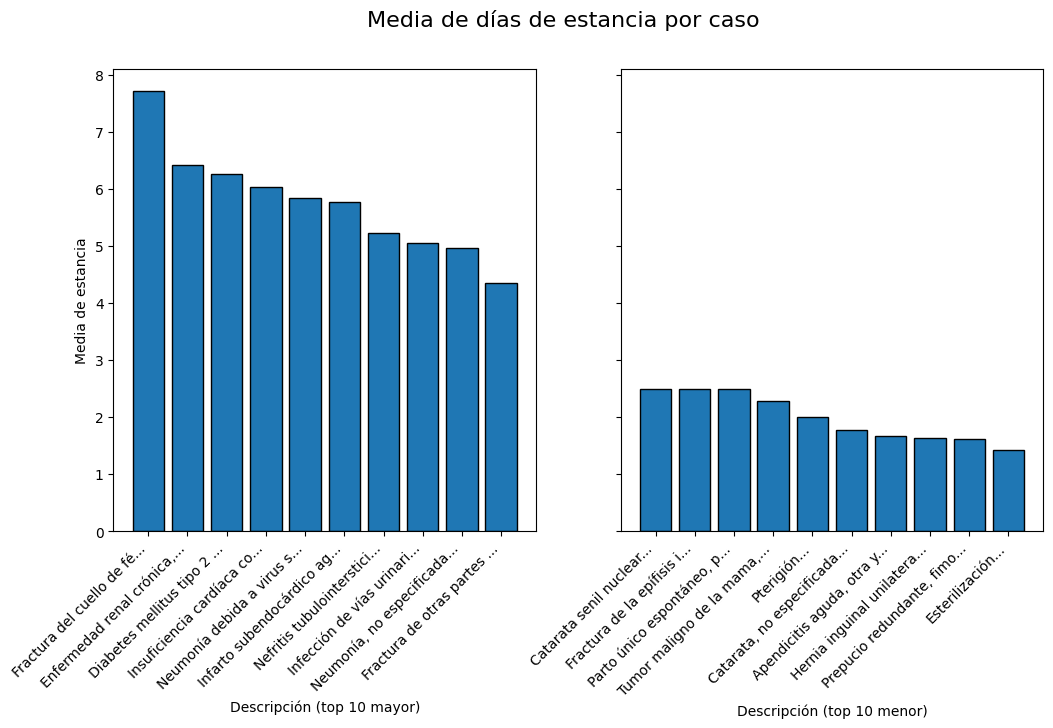

In [118]:
des_grp = (
    df
    .groupby('Descripción')['DIAS_ESTANCIA']
    .mean()
    .reset_index(name='PROM_DIAS_ESTANCIA')
    .sort_values('PROM_DIAS_ESTANCIA', ascending=False)
)

# 2) Mostrar tabla con el top 10 más alto
print("Top 10 casos por promedio de estancia:")
display(des_grp.head(10))

# 3) Mostrar tabla con el top 10 más bajo
print("Top 10 casos con menor promedio de estancia:")
display(des_grp.tail(10))


# 4) Gráfico de barras
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True, figsize=(12, 6))
fig.suptitle("Media de días de estancia por caso", fontsize = 16)

ax1.bar(des_grp['Descripción'].astype(str).head(10), des_grp['PROM_DIAS_ESTANCIA'].head(10), edgecolor='black')
ax1.set(xlabel = "Descripción (top 10 mayor)", ylabel = "Media de estancia")

ax2.bar(des_grp['Descripción'].astype(str).tail(10), des_grp['PROM_DIAS_ESTANCIA'].tail(10), edgecolor='black')
ax2.set(xlabel = "Descripción (top 10 menor)")

for ax in fig.axes:
    ax.set_xticklabels([label.get_text()[:25]+"..." for label in ax.get_xticklabels()], rotation=45, ha='right')

plt.show()

#### 2. Sexo
- Distribución

,SEXO,count
0,HOMBRE,15321
1,MUJER,31180


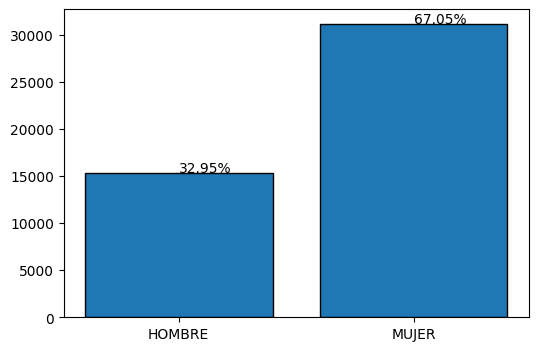

In [119]:
sexo_count = df.groupby("SEXO")["SEXO"].value_counts().to_frame().reset_index()
display(sexo_count)

plt.figure(figsize=(6,4))
plt.bar(sexo_count['SEXO'].astype(str), sexo_count['count'], edgecolor='black')
plt.text("HOMBRE", sexo_count['count'][0]+100, f"{round(sexo_count['count'][0]*100/sexo_count['count'].sum(), 2)}%")
plt.text("MUJER", sexo_count['count'][1]+100, f"{round(sexo_count['count'][1]*100/sexo_count['count'].sum(), 2)}%")
plt.show()

- Media de dias de estancia por sexo

Promedio de DIAS_ESTANCIA por SEXO:
  SEXO  PROM_DIAS_ESTANCIA
HOMBRE            4.368318
 MUJER            3.481462


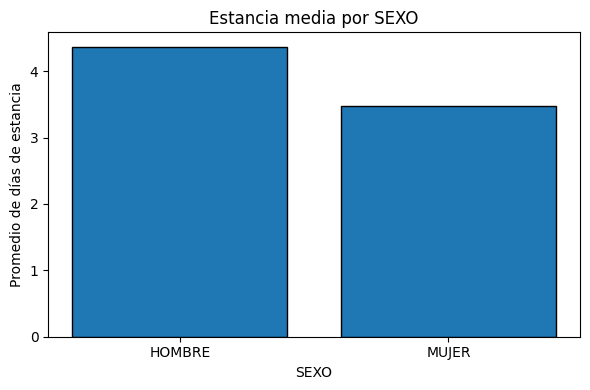

In [120]:
sexo_grp = (
    df
    .groupby('SEXO')['DIAS_ESTANCIA']
    .mean()
    .reset_index(name='PROM_DIAS_ESTANCIA')
)

# 2) Mostrar tabla
print("Promedio de DIAS_ESTANCIA por SEXO:")
print(sexo_grp.to_string(index=False))

# 3) Gráfico de barras
plt.figure(figsize=(6,4))
plt.bar(sexo_grp['SEXO'].astype(str), sexo_grp['PROM_DIAS_ESTANCIA'], edgecolor='black')
plt.xlabel('SEXO')
plt.ylabel('Promedio de días de estancia')
plt.title('Estancia media por SEXO')
plt.tight_layout()
plt.show()

En este caso, se puede observar una diferencia de tan solo 1 día en la media de días de estadía para hombres y mujeres, lo que no siguiere una diferencia significativa.

#### 3. Descripción 
métricas principales

In [121]:
# Agrupar, para facilitar el cálculo de las métricas
rep = df.groupby("Descripción")["Descripción"].count().to_frame(name = "Apariciones").sort_values("Apariciones", ascending = False)

print('Descripción')
print('\n---------------------------------------------------------------------------\n')
print(f'Cantidad de únicos:  {len(df["Descripción"].unique())}')
print(f'Más Repetido:        {rep.index.values[0]}')
print(f'Veces Repetido:      {rep.values[0][0]}')
print("\n---------------------------------------------------------------------------\n")

Descripción

---------------------------------------------------------------------------

Cantidad de únicos:  30
Más Repetido:        Apendicitis aguda, otra y no especificada
Veces Repetido:      4375

---------------------------------------------------------------------------



10 más repetidos

,Apariciones
Descripción,
"Apendicitis aguda, otra y no especificada",4375
Desgarro perineal de primer grado durante el parto,3906
"Parto único espontáneo, presentación cefálica de vértice",3039
Atención materna por cicatriz uterina debida a cirugía previa,3032
Cálculo de la vesícula biliar con colecistitis aguda,2784
Cálculo de la vesícula biliar sin colecistitis,2567
Nefritis tubulointersticial aguda,2472
"Ruptura prematura de las membranas, e inicio del trabajo de parto dentro de las 24 horas",2281
Neumonía debida a virus sincitial respiratorio,2215


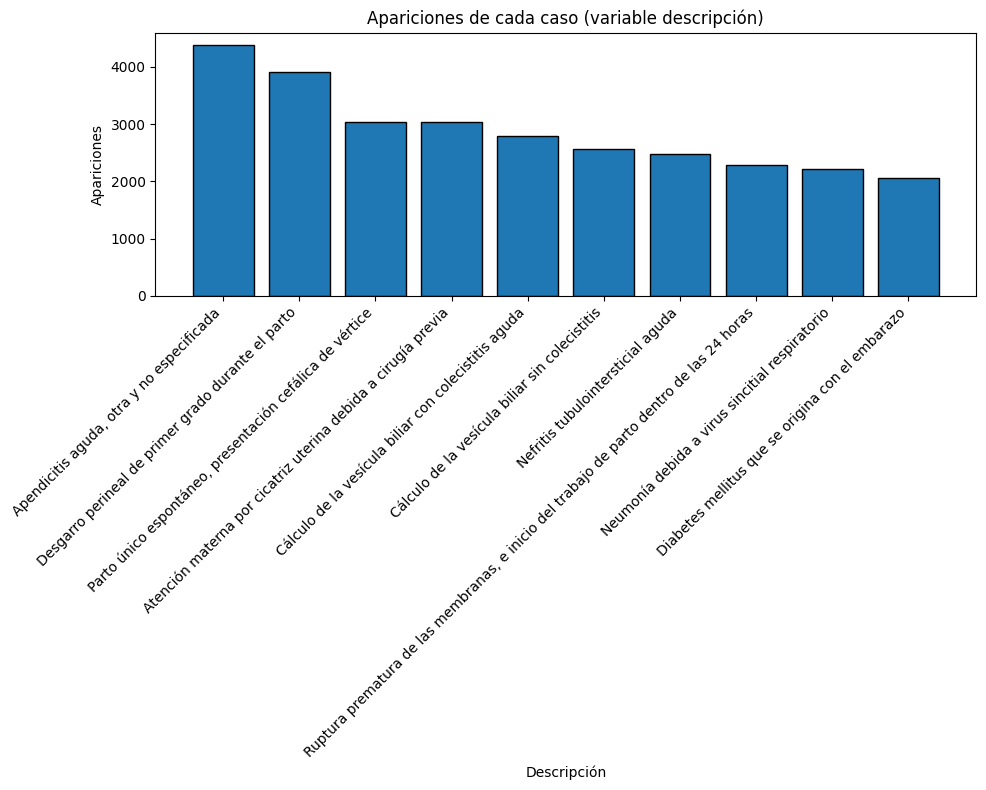

In [122]:
rep = df.groupby("Descripción")["Descripción"].count().to_frame(name = "Apariciones").sort_values("Apariciones", ascending = False).head(10)

display(rep)

rep = rep.reset_index(names='Descripción')

plt.figure(figsize=(10,8))
plt.bar(rep['Descripción'].astype(str), rep['Apariciones'], edgecolor='black')
plt.xlabel('Descripción')
plt.ylabel('Apariciones')
plt.title('Apariciones de cada caso (variable descripción)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 4. Reingreso
- Metricas principales

In [123]:
# Agrupar, para facilitar el cálculo de las métricas
rep = df.groupby("REINGRESO")["REINGRESO"].count().to_frame(name = "Apariciones").sort_values("Apariciones", ascending = False)

print('REINGRESO')
print('\n---------------------------------------------------------------------------\n')
print(f'Cantidad de únicos:  {len(df["REINGRESO"].unique())}')
print(f'Más Repetido:        {rep.index.values[0]}')
print(f'Veces Repetido:      {rep.values[0][0]}')
print("\n---------------------------------------------------------------------------\n")

REINGRESO

---------------------------------------------------------------------------

Cantidad de únicos:  2
Más Repetido:        0
Veces Repetido:      43063

---------------------------------------------------------------------------



- Distribución

,REINGRESO,Apariciones
0,0,43063
1,1,3438


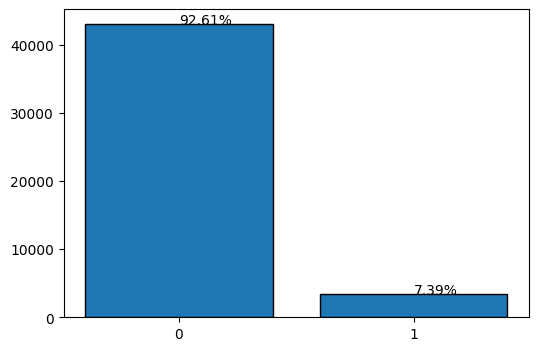

In [124]:
reingreso_count = df.groupby("REINGRESO")['REINGRESO'].value_counts().to_frame(name = "Apariciones").reset_index()
display(reingreso_count)

plt.figure(figsize=(6,4))
plt.bar(reingreso_count['REINGRESO'].astype(str), reingreso_count['Apariciones'], edgecolor='black')
plt.text(0, reingreso_count['Apariciones'][0], f"{round(reingreso_count['Apariciones'][0]*100/reingreso_count['Apariciones'].sum(), 2)}%")
plt.text(1, reingreso_count['Apariciones'][1], f"{round(reingreso_count['Apariciones'][1]*100/reingreso_count['Apariciones'].sum(), 2)}%")
plt.show()

#### 5. SERVICIO_SALUD
- Métricas principales

In [125]:
# Agrupar, para facilitar el cálculo de las métricas
rep = df.groupby("SERVICIO_SALUD")["SERVICIO_SALUD"].count().to_frame(name = "Apariciones").sort_values("Apariciones", ascending = False)

print('SERVICIO_SALUD')
print('\n---------------------------------------------------------------------------\n')
print(f'Cantidad de únicos:  {len(df["SERVICIO_SALUD"].unique())}')
print(f'Más Repetido:        {rep.index.values[0]}')
print(f'Veces Repetido:      {rep.values[0][0]}')
print("\n---------------------------------------------------------------------------\n")

SERVICIO_SALUD

---------------------------------------------------------------------------

Cantidad de únicos:  6
Más Repetido:        METROPOLITANO OCCIDENTE
Veces Repetido:      11361

---------------------------------------------------------------------------



- distribución

,SERVICIO_SALUD,Apariciones
0,METROPOLITANO CENTRAL,8173
1,METROPOLITANO NORTE,4506
2,METROPOLITANO OCCIDENTE,11361
3,METROPOLITANO ORIENTE,4056
4,METROPOLITANO SUR,8323
5,METROPOLITANO SURORIENTE,10082


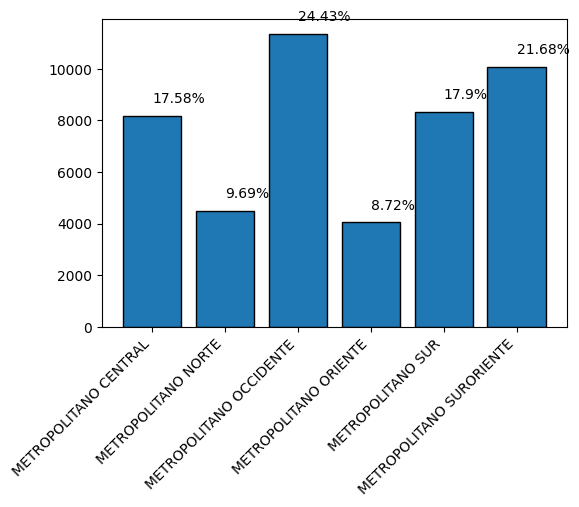

In [126]:
reingreso_count = df.groupby("SERVICIO_SALUD")['SERVICIO_SALUD'].value_counts().to_frame(name = "Apariciones").reset_index()
display(reingreso_count)

plt.figure(figsize=(6,4))
plt.bar(reingreso_count['SERVICIO_SALUD'].astype(str), reingreso_count['Apariciones'], edgecolor='black')
for i in range(len(reingreso_count['SERVICIO_SALUD'])):
    plt.text(reingreso_count['SERVICIO_SALUD'][i], reingreso_count['Apariciones'][i]+500, f'{round(reingreso_count["Apariciones"][i]*100/reingreso_count["Apariciones"].sum(), 2)}%')

plt.xticks(rotation = 45, ha='right')
plt.show()

- Media de estadía por SERVICIO_SALUD

Promedio de DIAS_ESTANCIA por SERVICIO_SALUD:
          SERVICIO_SALUD  PROM_DIAS_ESTANCIA
   METROPOLITANO CENTRAL            3.659733
     METROPOLITANO NORTE            4.080559
 METROPOLITANO OCCIDENTE            3.647390
   METROPOLITANO ORIENTE            4.145710
       METROPOLITANO SUR            3.708999
METROPOLITANO SURORIENTE            3.774846


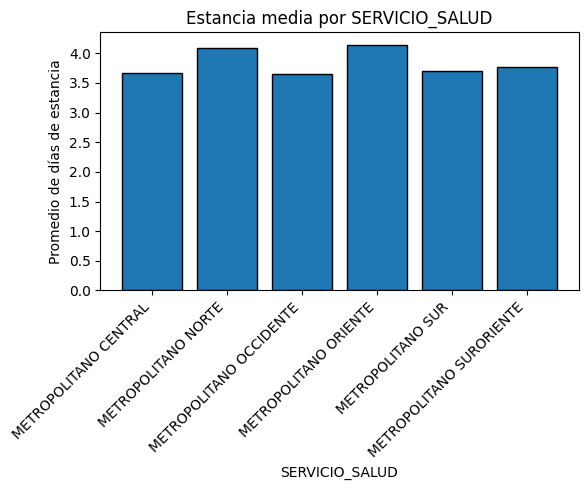

In [127]:
ss_grp = (
    df
    .groupby('SERVICIO_SALUD')['DIAS_ESTANCIA']
    .mean()
    .reset_index(name='PROM_DIAS_ESTANCIA')
)

# 2) Mostrar tabla
print("Promedio de DIAS_ESTANCIA por SERVICIO_SALUD:")
print(ss_grp.to_string(index=False))

# 3) Gráfico de barras
plt.figure(figsize=(6,5))
plt.bar(ss_grp['SERVICIO_SALUD'].astype(str), ss_grp['PROM_DIAS_ESTANCIA'], edgecolor='black')
plt.xlabel('SERVICIO_SALUD')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Promedio de días de estancia')
plt.title('Estancia media por SERVICIO_SALUD')
plt.tight_layout()
plt.show()

### Correlaciones de las variables.
#### Separación entre variables categoricas y numéricas.
De esta manera, se pueden hacer las correlaciones:
- categoria-número
- categoría-categoría
- número-número

In [128]:
# Separación de variables categóricas y numéricas
df_copy = df.copy()
obj = []
num = []

df_copy["REINGRESO"] = df_copy["REINGRESO"].astype('str')

# Transformación a objetos categóricos
for i in df_copy.columns:
    if df_copy[i].dtype == "object":
        obj.append(i)
        df_copy[i] = pd.Categorical(df_copy[i])
    else:
        num.append(i)

obj2 = obj
df_copy_cat = df_copy[obj]
df_copy_num = df_copy[num]

### Correlación entre variables categóricas y numéricas.
Eta cuadrado se usa metrica del ANOVA (análisis de varianzas). Es utilizada para poder calcular la corerlacion (el nivel de explicación de la desviación estandar de variable respecto a otra variable). En este caso, es la más útil y acertada al momento de trabajar con variables categóricas y numéricas. Utiliza la suma de los cuadrados entre grupos y la suma total de los cuadrados.

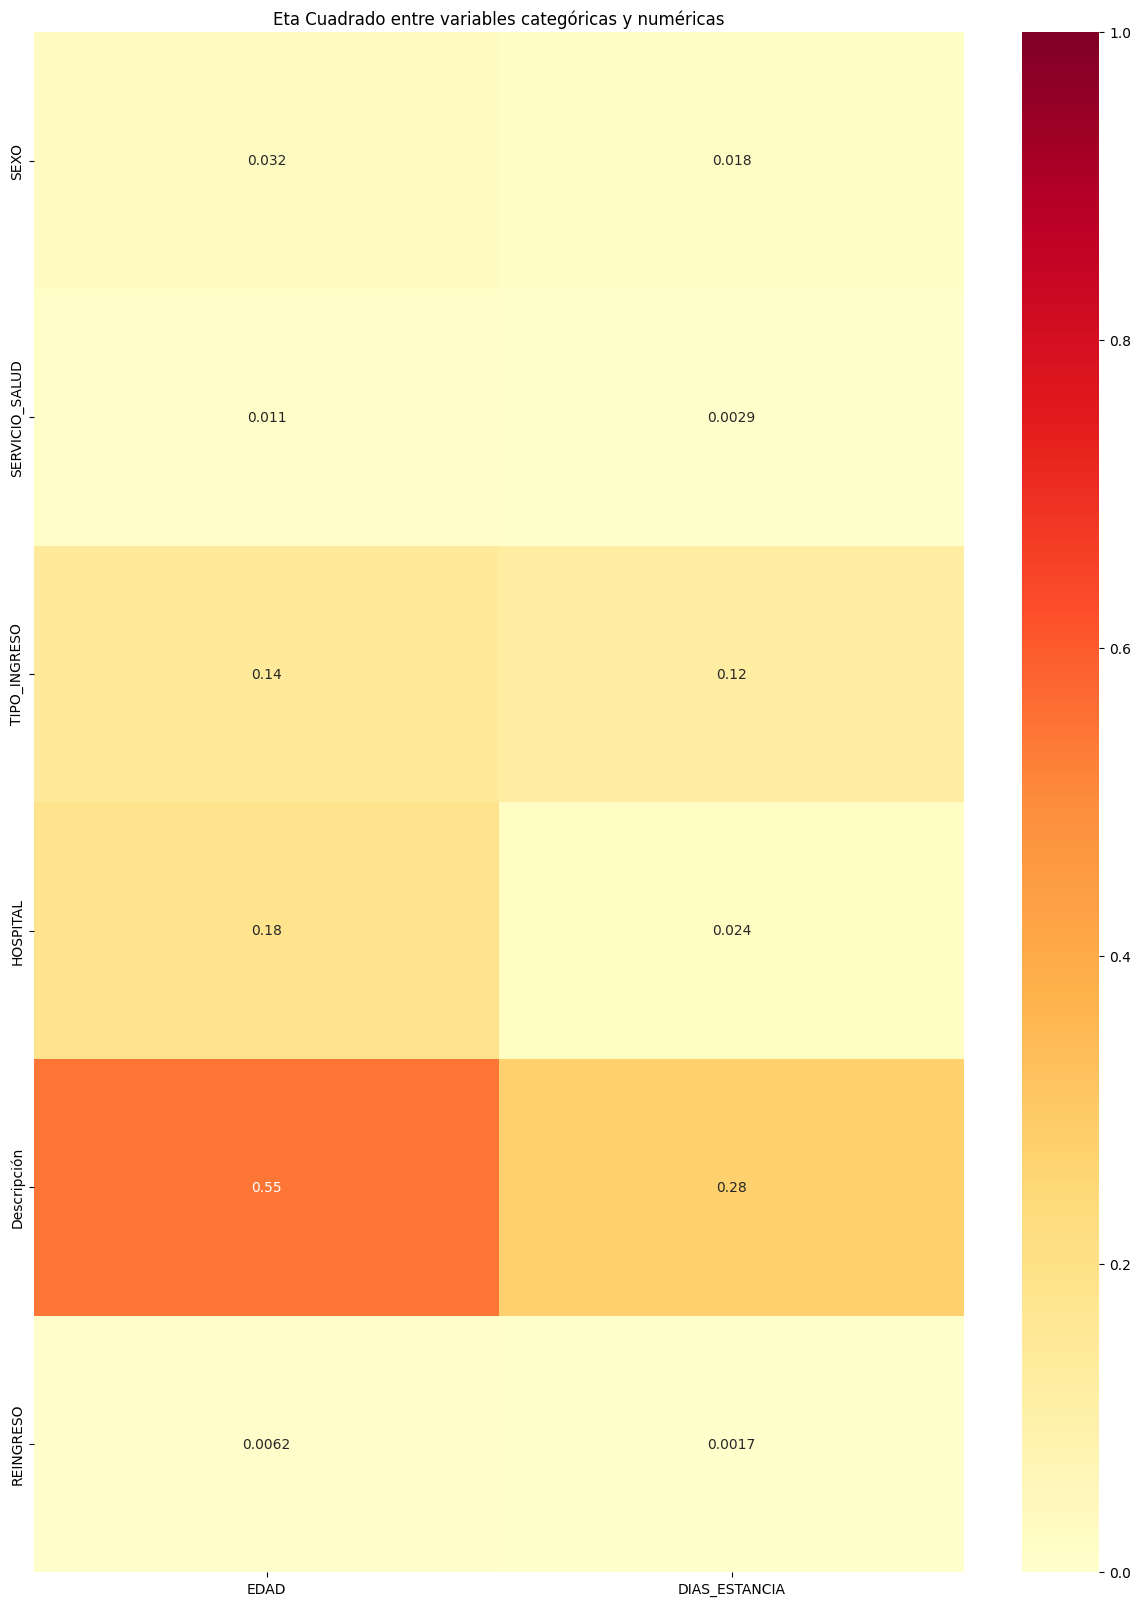

In [129]:

# Función para calcular el Eta caudrado
def eta_squared(df, num_col, cat_col):
    categories = df[cat_col].unique()
    grand_mean = df[num_col].mean()
    ss_between = sum(
        len(df[df[cat_col] == cat]) * (df[df[cat_col] == cat][num_col].mean() - grand_mean) ** 2
        for cat in categories
    )
    ss_total = sum((df[num_col] - grand_mean) ** 2)
    return ss_between / ss_total

# Se define la matriz vacía
corr_matrix = pd.DataFrame(index = obj, columns = num)

# Se asignan los valores aplicando la función definida
for i in obj:
    for j in num:
        eta = eta_squared(df_copy, j, i)
        corr_matrix.loc[i, j] = eta

# Estandarización de la matriz
corr_matrix = corr_matrix.astype(float)
corr_matrix = corr_matrix.fillna(0)

# plot de la matriz
fig = plt.figure(figsize=(15,20))
sns.heatmap(corr_matrix, annot = True, cmap = "YlOrRd", vmin = 0, vmax = 1)
plt.title("Eta Cuadrado entre variables categóricas y numéricas")
plt.savefig("corr_cat_num.png", dpi = 300, bbox_inches = "tight")
plt.show()


# PENDIENTE

### Correlación solo entre variables categóricas.

Para la medida de correlación se de variables categóricas se usa Cramer's V, que mide la fortaleza de la relación sin dirección, es decir, indica que tan realcionadas están las variables, pero sin decir si es de manera positiva o negativa (debido a que no son valores númericos, no tendría sentido una relación "negativa") Para su calculo se utiliza el Chi cuadrado, la cantidad de observaciones y el menor numero entre las filas y las columnas.

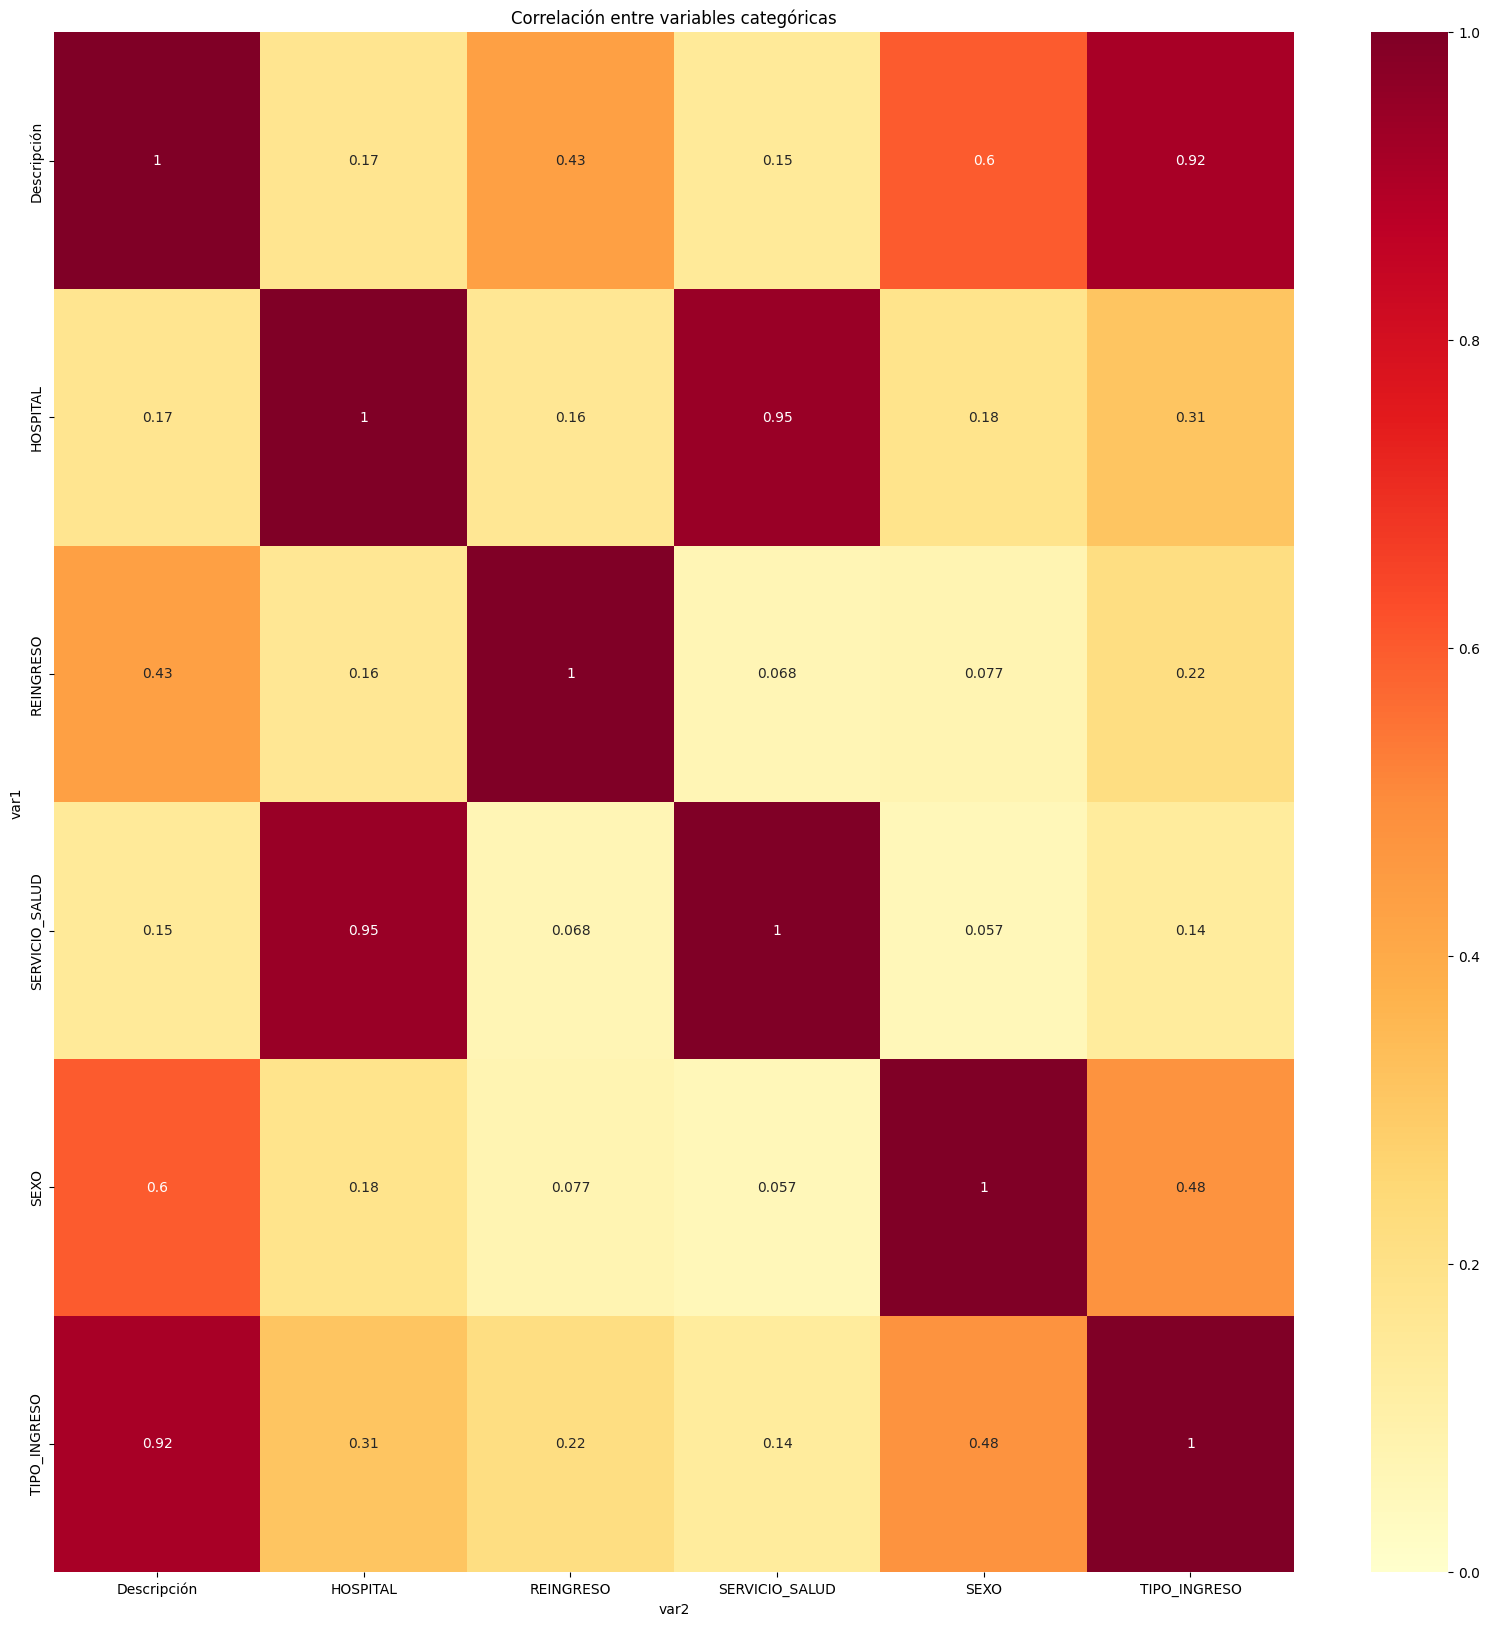

In [130]:
cat_var_prod = list(it.product(obj,obj2, repeat = 1))
result = []

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = sp.stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

for i in cat_var_prod:
    result.append((i[0], i[1], cramers_v(df_copy_cat[i[0]], df_copy_cat[i[1]])))

corr_output = pd.DataFrame(result, columns = ["var1", "var2", "Corr"])
corr_output = corr_output.pivot(index = "var1", columns="var2", values = "Corr")
corr_output = corr_output.astype(float)

fig = plt.figure(figsize=(20,20))
sns.heatmap(corr_output, annot = True, cmap = "YlOrRd", vmin = 0, vmax = 1)
plt.title("Correlación entre variables categóricas")
plt.savefig("corr_cat_cat.png", dpi = 300, bbox_inches = "tight")
plt.show()

# PENDIENTE

### Correlación variables numéricas.

En este caso, se usa el metodo de correlación proveniente de la librería de pandas.

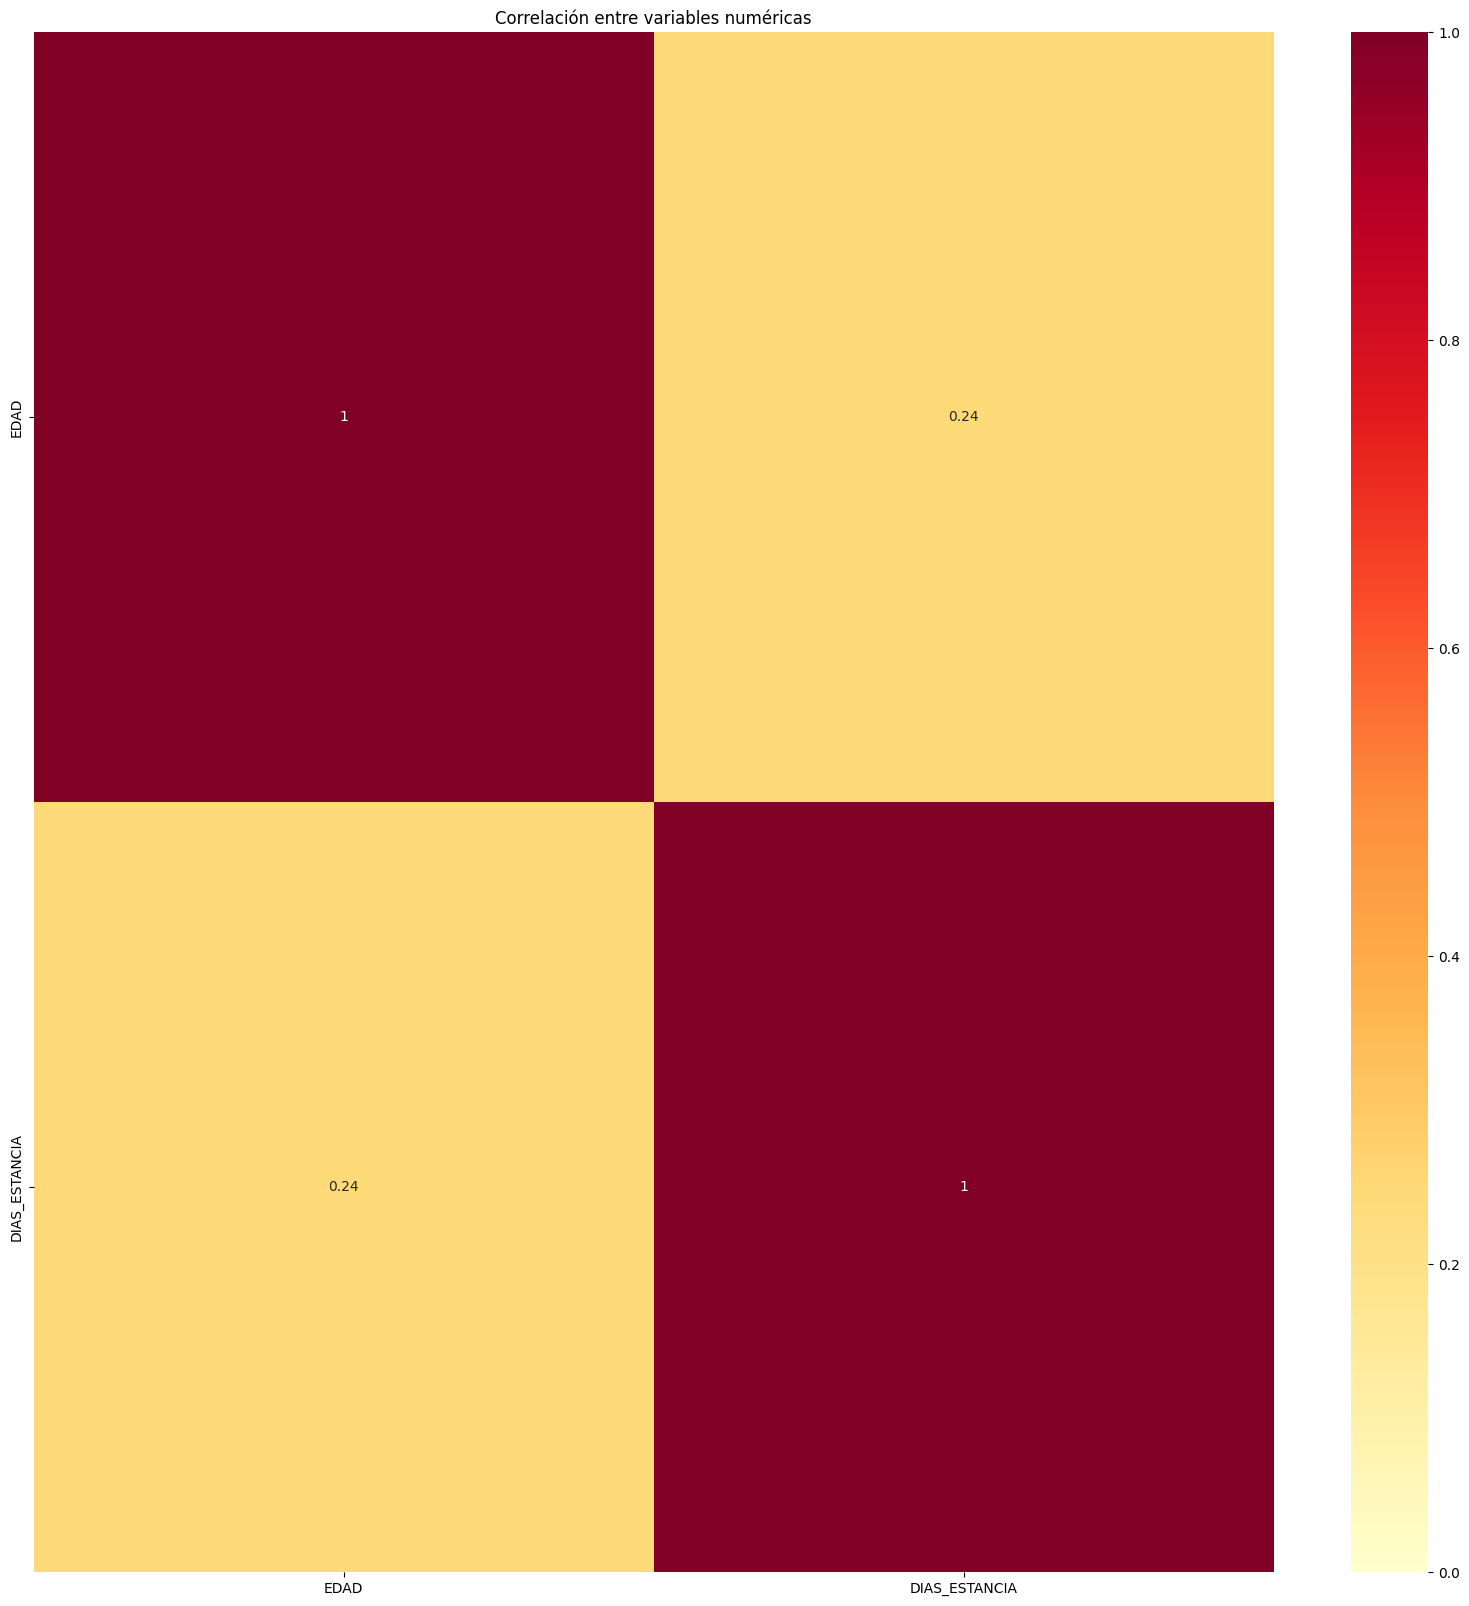

In [131]:
correlations = df_copy_num.corr(method = "pearson")

# Plot de la matriz
fig = plt.figure(figsize=(20,20))
sns.heatmap(correlations, annot = True, cmap = "YlOrRd", vmin = 0, vmax = 1)
plt.title("Correlación entre variables numéricas")
plt.savefig("corr_num_num.png", dpi = 300, bbox_inches = "tight")
plt.show()

# PENDIENTE

## <p style="text-align:center;">Realización del modelo.</p>
#### Verificar multicolinealidad

Tal como se observa anteriormente, las correlaciones entre als variables independientes (TIPO_INGRESO - Descripcion)